In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('ggplot')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/countries-of-the-world/countries of the world.csv


In [2]:
cont = pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')
print(cont.shape)
cont.head()

(227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [4]:
cont.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


#### CHECKS TO PERFORM :
##### Quality :
*  Missing values from feature 'Net migration' onwards.
*  Climate column shows deviation from data. (float values instead of int in an ordinal column)
*  All decimal points have been replaced wrongly by commas.
*  Unit of measurement of Population density is unclear.
*  There's a column - Other(%). Information imparted is unclear.
*  Correct the data types of the erronous numerical columns.

##### Tidiness :
*  Rename columns for better usability.

In [5]:
type(cont['Infant mortality (per 1000 births)'].values[2])

str

In [6]:
# Creating copy
cnt = cont.copy()
cnt.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


#### COMPLETENESS ISSUES
*  Missing values from feature 'Net migration' onwards.
*  There's a column - Other(%). Information imparted is unclear.

##### DEFINE
Replacing missing values in the columns with missing values with zero. But will have to handle the 'Climate' column later.
##### CODE

In [7]:
# Renaming columns for better usability
new_column_name = {'Area (sq. mi.)':'Area' , 'Pop. Density (per sq. mi.)':'Pop_density' , 
                  'Coastline (coast/area ratio)':'Coastline' , 
                  'Infant mortality (per 1000 births)':'Infant_mortality' , 'GDP ($ per capita)':'GDP_per_capita' ,
                  'Literacy (%)':'Literacy_percent' , 'Phones (per 1000)':'Phones_per_k' , 'Arable (%)':'Arable' ,
                   'Crops (%)':'Crops' ,'Other (%)':'Other'}
cnt = cnt.rename(columns = new_column_name )
cnt

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [8]:
cnt = cnt.fillna(0)

##### TEST

In [9]:
cnt.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_density         0
Coastline           0
Net migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy_percent    0
Phones_per_k        0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
dtype: int64

In [10]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null object
Coastline           227 non-null object
Net migration       227 non-null object
Infant_mortality    227 non-null object
GDP_per_capita      227 non-null float64
Literacy_percent    227 non-null object
Phones_per_k        227 non-null object
Arable              227 non-null object
Crops               227 non-null object
Other               227 non-null object
Climate             227 non-null object
Birthrate           227 non-null object
Deathrate           227 non-null object
Agriculture         227 non-null object
Industry            227 non-null object
Service             227 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 35.6+ KB


##### TEST

##### DEFINE
Removing 'Other' if it has no significance
##### CODE

In [11]:
'''plt.figure(figsize=(20,10))
sns.heatmap(cnt.corr(),annot=True)
plt.show()'''

# Can't test before tidiness issues are handled.

'plt.figure(figsize=(20,10))\nsns.heatmap(cnt.corr(),annot=True)\nplt.show()'

##### TEST

In [12]:
# Nothing to test, no changes made

##### TIDINESS ISSUES
*  Climate column shows deviation from data. (float values instead of int in an ordinal column)
*  All decimal points have been replaced wrongly by commas.
*  Correct the data types of the erronous numerical columns.

##### DEFINE
Replace all decimal values with decimal point instead of commas and change data type from str to float

##### CODE

In [13]:
def rectify(cols):
    for c in cols:
        cnt[c] = cnt[c].astype(str)
        new_data = []
        for val in cnt[c]:
            val = val.replace(',','.')
            val = float(val)
            new_data.append(val)

        cnt[c] = new_data

# Running on dataset
cols = cnt[['Pop_density' , 'Coastline' , 'Net migration' , 'Infant_mortality' , 
                   'Literacy_percent' , 'Phones_per_k' , 'Arable' , 'Crops' , 'Other' , 'Climate' , 'Birthrate' , 'Deathrate' , 'Agriculture' ,
                   'Industry' , 'Service']]
rectify(cols)

##### TEST

In [14]:
cnt.head()

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


##### DEFINE
Convert the decimal values in 'Climate' column to integer values to match the feature type(Ordinal). Must be in one of the classes : {1,2,3,4,}

##### CODE

In [15]:
cnt.Climate.unique()

array([1. , 3. , 2. , 0. , 4. , 1.5, 2.5])

In [16]:
cnt['Climate'] = cnt['Climate'].astype('int')

##### TEST 1

In [17]:
cnt.Climate.unique()

array([1, 3, 2, 0, 4])

### We have to handle the zero, because it is not a member of the label set. Replace with most frequent climate label. Though this is not a feasible solution and we cannot conclude without proper data.

In [18]:
cnt.Climate.value_counts().sort_values(ascending=False)

2    114
3     48
1     37
0     22
4      6
Name: Climate, dtype: int64

In [19]:
cnt.Climate.replace(0,2,inplace=True)

##### TEST 2

In [20]:
cnt.Climate.unique()

array([1, 3, 2, 4])

##### HANDLING THE ONE COMPLETEMESS ISSUE LEFT DUE TO TIDINESS ISSUES
*  There's a column - Other(%). Information imparted is unclear.

##### DEFINE
Check the realtion with other features. If relation/dependency observed, keep. Else, remove.

##### CODE

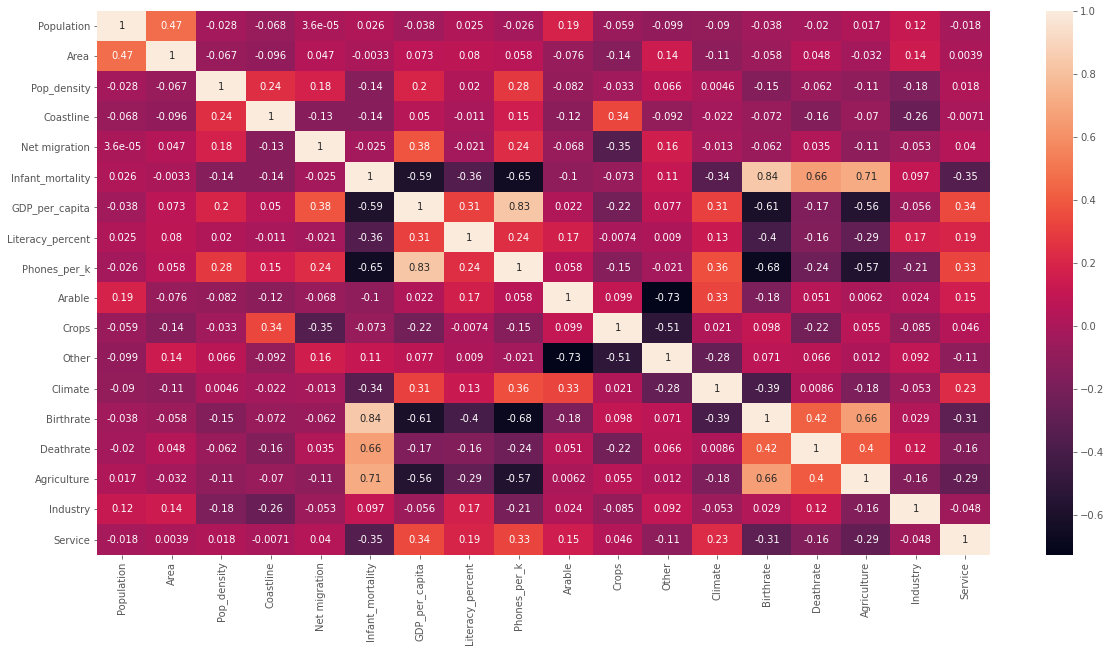

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(cnt.corr(),annot=True)
plt.show()

#### We see that none of the features seem to show linear dependency/relation with the 'Other' feature, except 'Arable' and 'Crops'. So, maybe 'Other' is related to them and is a feature similar to them. 'Arable' is the most related to 'Other'. 'Other' is kept.

##### TEST
Nothing to test. No changes made

### All noted anomalies handled.

##### FINAL CHECK

In [22]:
cont = cnt
cont.head()

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.000,0.000,0.000


In [23]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline           227 non-null float64
Net migration       227 non-null float64
Infant_mortality    227 non-null float64
GDP_per_capita      227 non-null float64
Literacy_percent    227 non-null float64
Phones_per_k        227 non-null float64
Arable              227 non-null float64
Crops               227 non-null float64
Other               227 non-null float64
Climate             227 non-null int64
Birthrate           227 non-null float64
Deathrate           227 non-null float64
Agriculture         227 non-null float64
Industry            227 non-null float64
Service             227 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 35.6+ KB


In [24]:
cont.describe()

,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.037621,35.037709,9647.136564,76.269604,231.901762,13.675551,4.524009,80.919031,2.101322,21.822467,9.078502,0.140877,0.262784,0.527930
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856712,35.388330,10047.485847,29.346066,228.099042,13.046722,8.335358,17.795561,0.687015,11.387139,5.093580,0.146730,0.151741,0.213272
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,7.825000,1900.000000,62.950000,33.050000,3.095000,0.190000,70.875000,2.000000,12.350000,5.755000,0.030500,0.170000,0.404500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,20.910000,5500.000000,90.300000,164.100000,10.380000,1.010000,85.380000,2.000000,18.710000,7.820000,0.090000,0.259000,0.559000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.000000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [25]:
cont.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_density         0
Coastline           0
Net migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy_percent    0
Phones_per_k        0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [26]:
cont.head()

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.000,0.000,0.000


#### POPULATION V/S COUNTRY AND V/S REGION

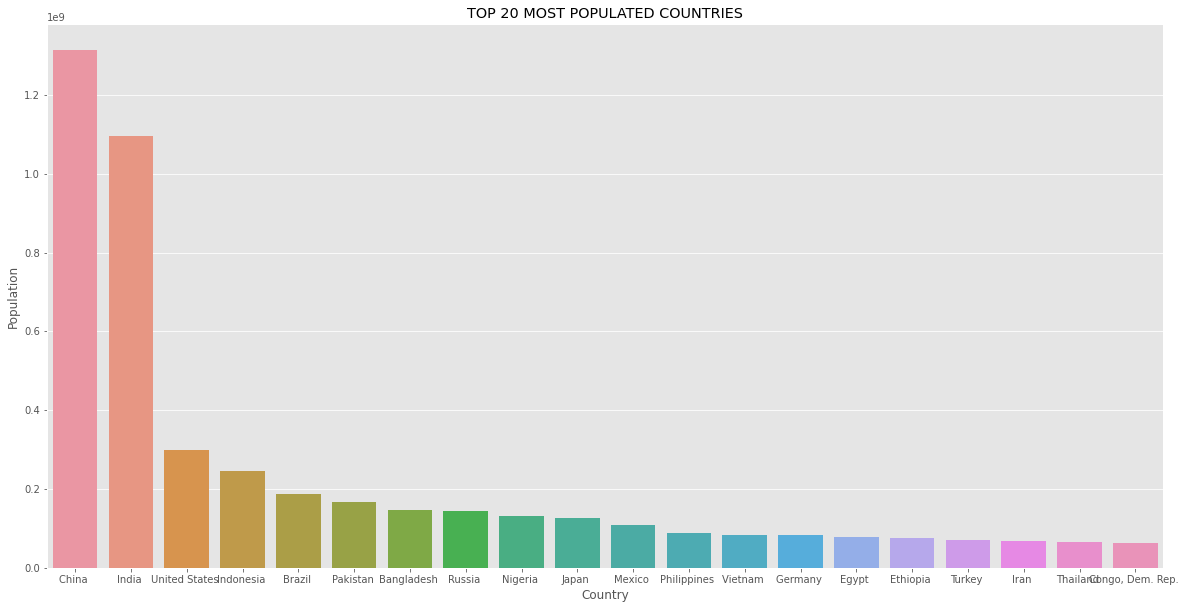

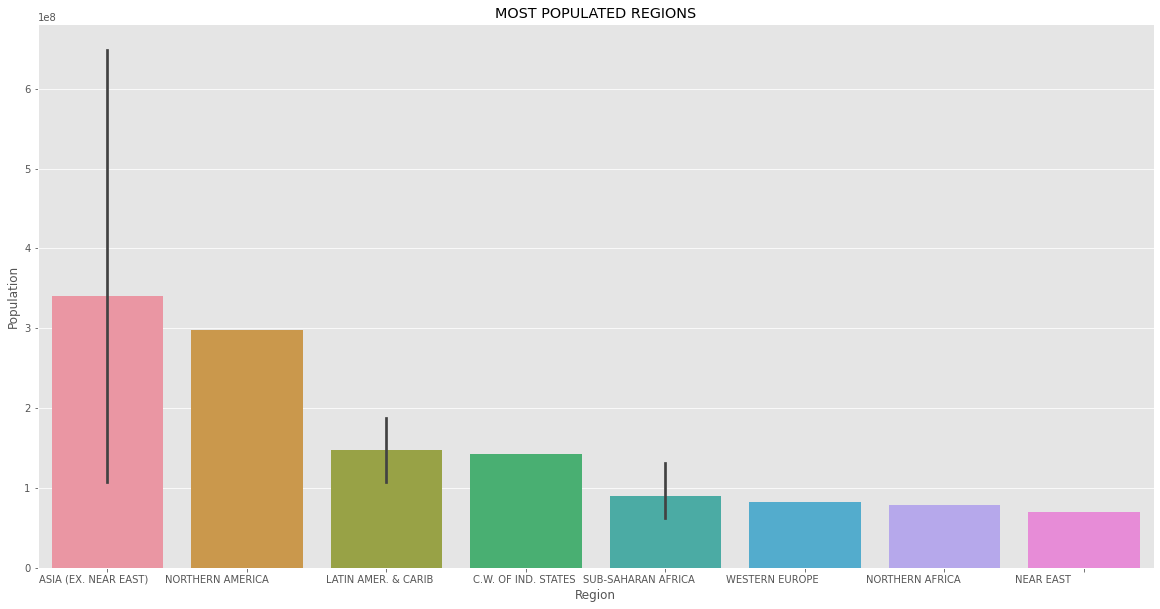

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(data = cnt.nlargest(20, 'Population'), x = 'Country', y = 'Population')
plt.title("TOP 20 MOST POPULATED COUNTRIES")
plt.show()

# Region
plt.figure(figsize=(20,10))
sns.barplot(data = cnt.nlargest(20, 'Population'), x = 'Region', y = 'Population')
plt.title("MOST POPULATED REGIONS")
plt.show()

*  We observe that India has the 2nd highest population.
*  USA accounts to the most of Northern American population.

##### INFANT MORTALITY, BIRTH RATE, DEATH RATE

In [28]:
# Group data together
hist_data = [cont['Infant_mortality'], cnt['Birthrate'], cnt['Deathrate']]

group_labels = ['Infant_mortality', 'Birth Rate', 'Death Rate']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(
    margin=dict(l=10, b=10))
fig.show()

In [29]:
fig = go.Figure(data=[
    go.Bar(name='INFANT MORTALITY', x=cont.nlargest(10, 'Population')['Country'], y=cont['Infant_mortality']),
    go.Bar(name='BIRTH RATE', x=cont.nlargest(10, 'Population')['Country'], y=cont['Birthrate']),
    go.Bar(name='DEATH RATE', x=cont.nlargest(10, 'Population')['Country'], y=cont['Deathrate'])
])

fig.update_layout(barmode='group')
fig.show()

*  All measurements are in % (per cent)
*  This is a comparison between the infant mortality rate, birth rate, death rate of the highest populated countries. 
*  Pakistan has the highest infant mortality rate, followed by China. 
*  It is shocking to see India still has such a low infant mortality rate.
*  However, India has a lower death rate compared to China and Pakistan. 
*  Birth rate seems fairly normal.
*  China and Pakistan have an alarmigly high birth ad death rates.

In [30]:
trace1 = go.Scatter(
    x = cont.index,
    y = cont.Deathrate,
    mode = 'lines+markers',
    name = 'Death Rate',
    marker = dict(color = 'rgba(255, 81, 51, 0.5)'),
    text = cont.Country)

trace2 = go.Scatter(
    x = cont.index,
    y = cont.Birthrate,
    mode = 'lines+markers',
    name = 'Birth Rate',
    marker = dict(color = 'rgba(105, 100, 255, 0.5)'),
    text = cont.Country)

layout = dict(title = 'Birth Rate v/s Death Rate of Countries',
             xaxis= dict(zeroline= False)
             )

data = [trace1, trace2]

fig = dict(data = data, layout = layout)

iplot(fig)

*  The Birth Rate is, in general, higher for most countries.
*  A few like like, Bostwana, Bulgaria, Estonia etc show deviation.
*  Countries with higher Death rate -

In [31]:
cont[cont.Deathrate > cont.Birthrate]

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3,8.74,9.76,0.018,0.304,0.678
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4,11.16,14.02,0.093,0.316,0.591
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,80.5,0.65,0.01,99.34,1,23.08,29.50,0.024,0.469,0.507
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3,9.65,14.27,0.093,0.304,0.603
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,2,9.61,11.48,0.070,0.308,0.622
53,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,0.00,0.97,3.93,15700.0,99.9,314.3,39.80,3.05,57.15,3,9.02,10.59,0.034,0.393,0.573
64,Estonia,BALTICS,1324333,45226,29.3,8.39,-3.16,7.87,12300.0,99.8,333.8,16.04,0.45,83.51,3,10.04,13.25,0.040,0.294,0.666
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,667.9,33.85,0.59,65.56,3,8.25,10.62,0.009,0.296,0.695
79,Greece,WESTERN EUROPE,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,8.78,70.12,3,9.68,10.24,0.054,0.213,0.733
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,0.0,842.4,0.00,0.00,0.00,3,8.81,10.01,0.030,0.100,0.870


In [32]:
perc = cont[cont.Deathrate > cont.Birthrate].shape[0]
perc

25

In [33]:
# PERCENTAGE OF COUNTRIES WITH HIGHER DEATH RATE
fig = go.Figure(data=[go.Pie(labels=['Death Rate > Birth Rate','Birth Rate > Death Rate'], values=[perc,(cont.shape[0]-perc)])])
fig.show()

*  Only 11%

##### AGRICULTURE, INDUSTRY, SERVICES : HOW WELL ARE THEY IN THE SO CALLED DEVELOPED COUNTRIES ?
Note : All measurements are in % (per cent)

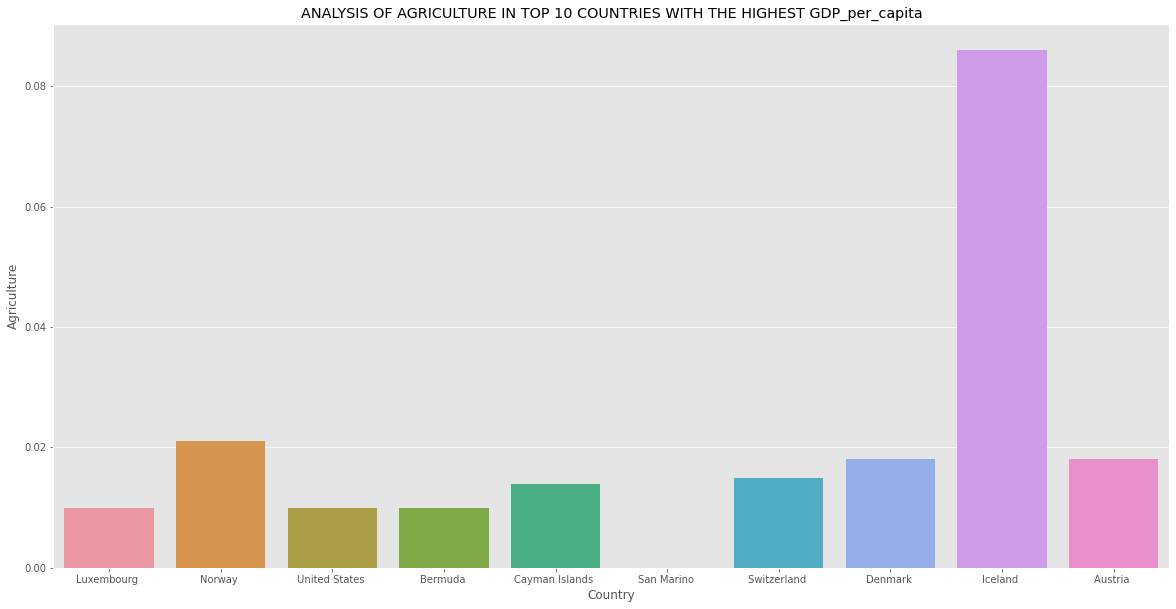

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(data = cont.nlargest(10, 'GDP_per_capita'), x = 'Country', y = 'Agriculture')
plt.title("ANALYSIS OF AGRICULTURE IN TOP 10 COUNTRIES WITH THE HIGHEST GDP_per_capita")
plt.show()

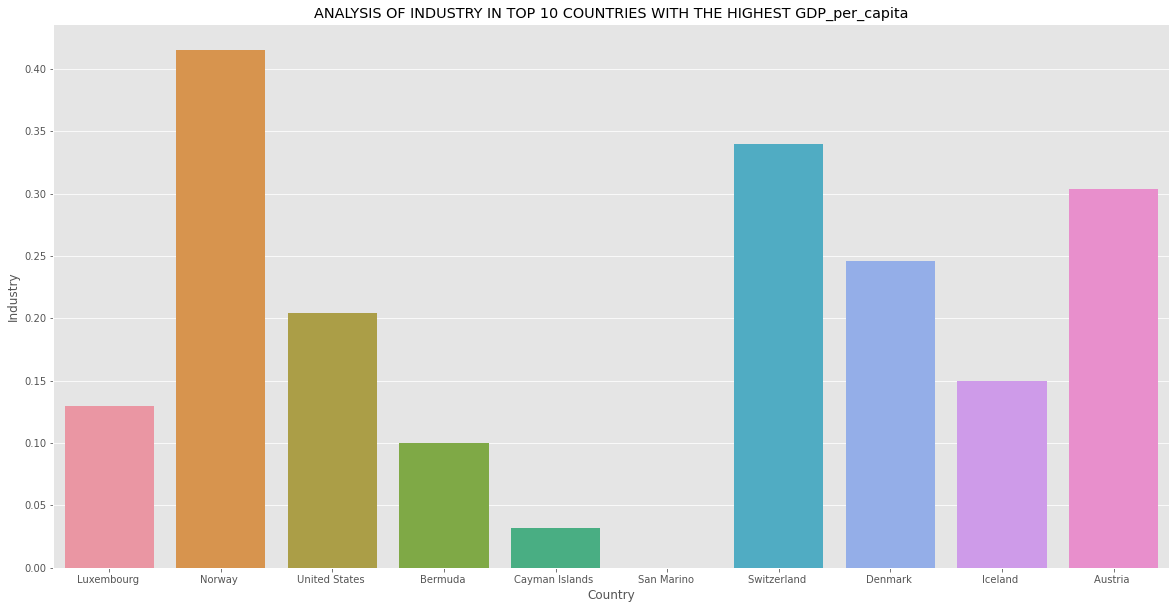

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(data = cont.nlargest(10, 'GDP_per_capita'), x = 'Country', y = 'Industry')
plt.title("ANALYSIS OF INDUSTRY IN TOP 10 COUNTRIES WITH THE HIGHEST GDP_per_capita")
plt.show()

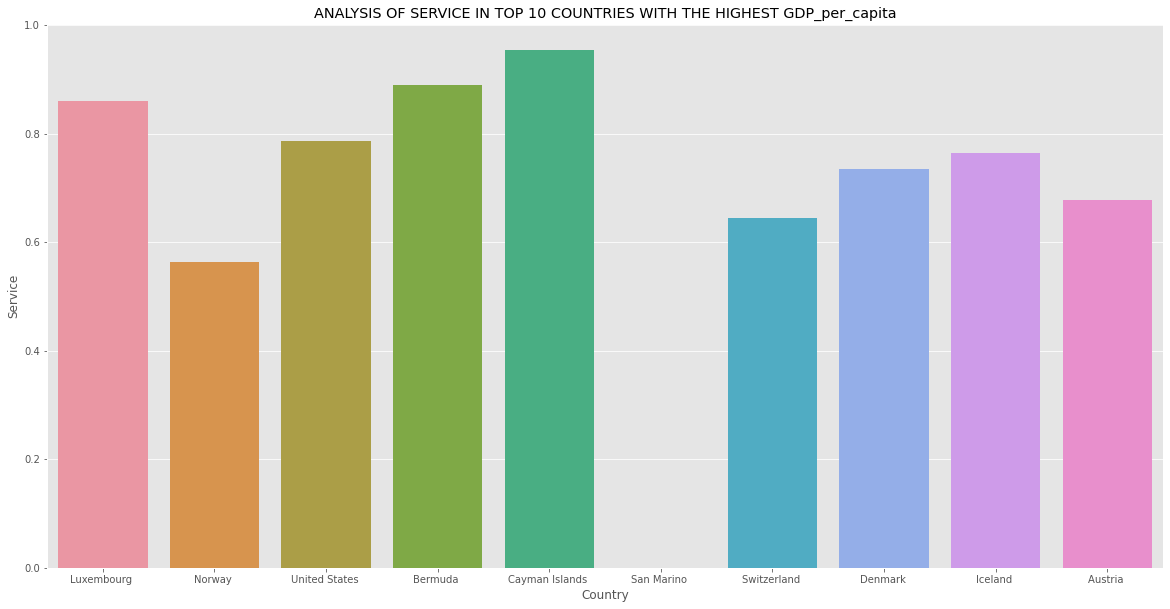

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(data = cont.nlargest(10, 'GDP_per_capita'), x = 'Country', y = 'Service')
plt.title("ANALYSIS OF SERVICE IN TOP 10 COUNTRIES WITH THE HIGHEST GDP_per_capita")
plt.show()

*  San Marino looks confusing, and strikes as odd having no revenue at all from any of the sectors, yet being a high GDP country.
*  Almost all countries have a fairly high revenue from Service, information goes hand in hand with their GDP.
*  Iceland achieves the highest revenue from Agriculture(very obvious and expected).
*  Investigating San Marino - 

In [37]:
cnt[cnt['Country'] == "San Marino "]

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
177,San Marino,WESTERN EUROPE,29251,61,479.5,0.0,10.98,5.73,34600.0,96.0,704.3,16.67,0.0,83.33,2,10.02,8.17,0.0,0.0,0.0


#### Since data for San Marino under all 3 sectors is 0, there are two possibilities :
1.  Data is really 0 - Highly impossible. Because we know it is a high GDP country, information is contradictory.
2.  Data was missing - Most possible scenario.

##### SECTOR WISE CONTRIBUTION OF TOP 30 HIGH GDP COUNTRIES

In [38]:
cont_gdp_sorted = pd.DataFrame(cont.sort_values(ascending=False,by=['GDP_per_capita']))
cont_gdp = cont_gdp_sorted.nlargest(30,'GDP_per_capita')

trace0 = go.Bar(
    x = cont_gdp.Country,
    y = cont_gdp['Agriculture'],
    name = "Agriculture",
    marker = dict(color = 'rgba(255, 26, 26, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=3)))

trace1 = go.Bar(
    x = cont_gdp.Country,
    y = cont_gdp['Industry'],
    name = "Industry",
    marker = dict(color = 'rgba(255, 255, 51, 0.5)',
                line=dict(color='rgb(100,100,100)',width=3)))

trace2 = go.Bar(
    x = cont_gdp.Country,
    y = cont_gdp['Service'],
    name = "Service",
    marker = dict(color = 'rgba(77, 77, 255, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=3)))

data = [trace0, trace1, trace2]
layout = go.Layout(barmode = "stack")
fig = go.Figure(data = data,layout = layout)
iplot(fig)

##### CONCLUSION :
*  WE SEE THAT FOR MOST COUNTRIES, THE MAJOR THRIVING SECTOR IS SERVICE FOLLOWED BY INDUSTRY. 
    -  Except for UAE, which has Industry as its major sector.
*  SAN MARINO AS WE KNOW, HAS NO DATA FOR THESE SECTORS, BUT ITS PRESENCE SHOWS THAT IT IS A HIGH GDP COUNTRY
*  MONACO HAS NO RECORDED DATA FOR ANY SECTOR OTHER THAN AGRICULTURE. THERE CAN BE CONCLUSIONS :
    -  Monaco has only agriculture as its major sector
    -  Data has not been recorded for Monaco
    
##### CORRELATION OF GDP_PER_CAPITA WITH AGRICULTURE, INDUSTRY AND SERVICE SECTORS : HOW MUCH RELATED ARE THEY WITH GDP ?

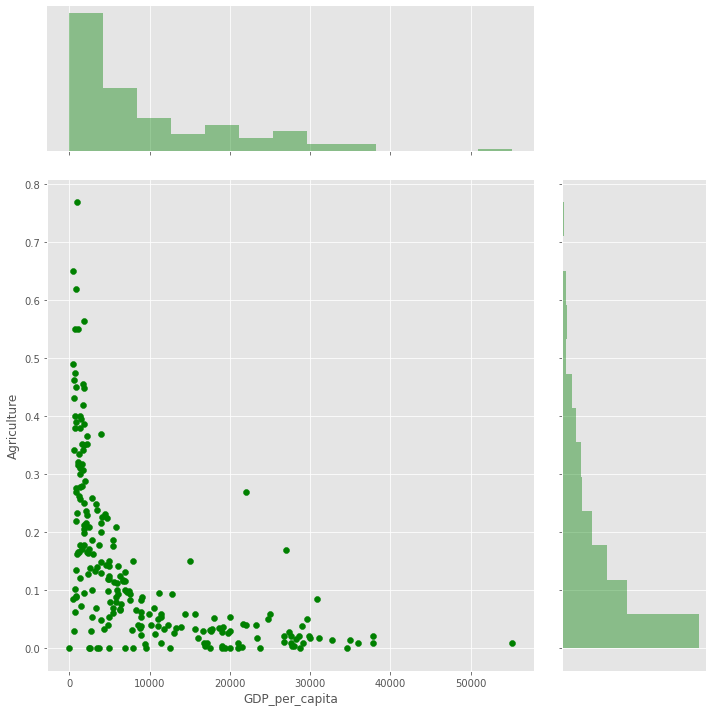

In [39]:
sns.jointplot(x="GDP_per_capita", y="Agriculture", data=cont, height=10, ratio=3, color="g")
plt.show()

##### AGRICULTURE HAS MODERATE NEGATIVE CORRELATION WITH GDP

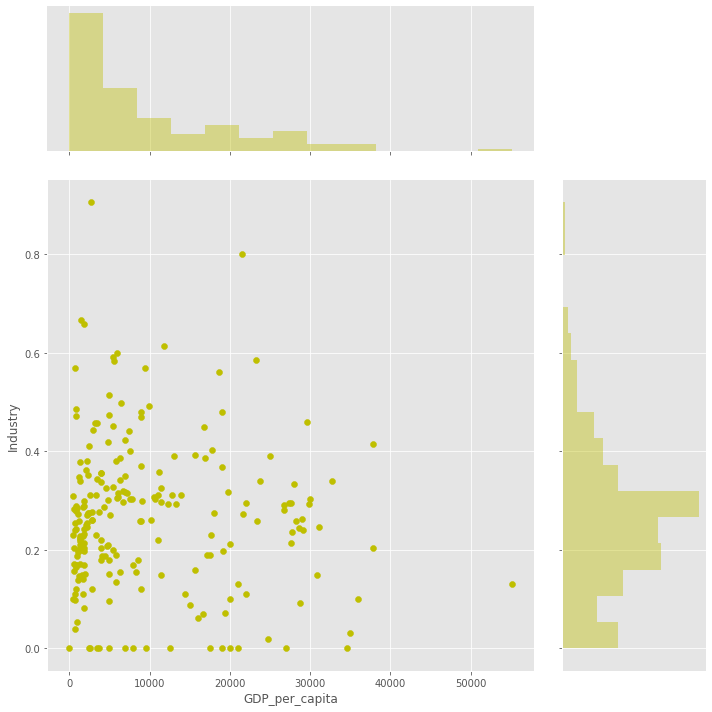

In [40]:
sns.jointplot(x="GDP_per_capita", y="Industry", data=cont, height=10, ratio=3, color="y")
plt.show()

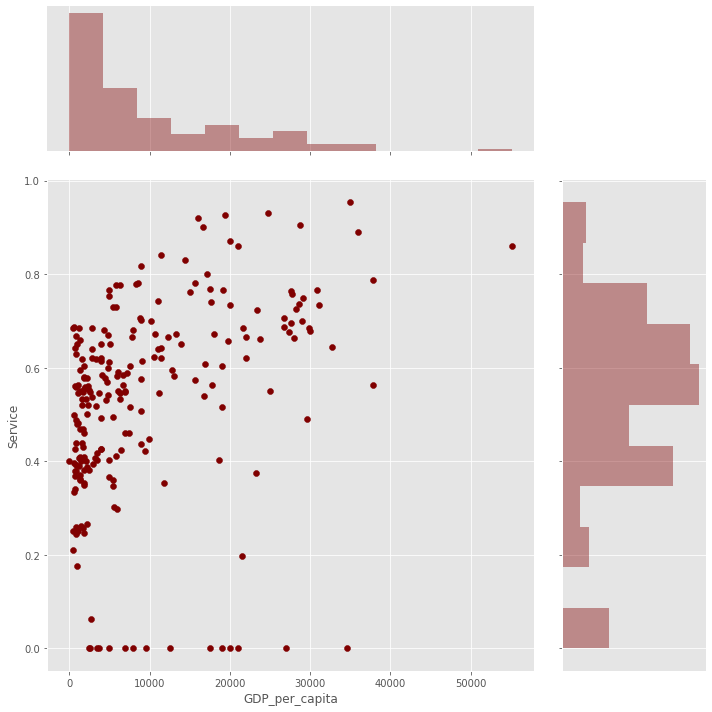

In [41]:
sns.jointplot(x="GDP_per_capita", y="Service", data=cont, height=10, ratio=3, color="maroon")
plt.show()

##### INDUSTRY AND SERVICE, BEING THE IMPORTANT SECTORS, YET THEY SHOW POOR CORRELATION WITH GDP.
##### ANALYSING THE EFFECT OF LITERACY RATE
##### LITERACY RATE TREND : 20 HIGHEST AND 20 LOWEST LITERACY RATES 

In [42]:
cont_lit_sorted = pd.DataFrame(cont.sort_values(ascending=False,by=['Literacy_percent'])).head(20)

fig = go.Figure([go.Bar(x=cont_lit_sorted.Country, y=cont_lit_sorted.Literacy_percent)])
fig.update_traces(marker_color='rgb(225,140,160)', marker_line_color='rgb(110,48,10)',
                  marker_line_width=1.5)
fig.show()

In [43]:
cont_lit_sorted

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1,12.14,7.51,0.038,0.262,0.700
119,Liechtenstein,WESTERN EUROPE,33987,160,212.4,0.00,4.85,4.70,25000.0,100.0,585.5,25.00,0.00,75.00,4,10.21,7.18,0.060,0.390,0.550
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.000,0.000,0.000
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3,11.46,9.40,0.021,0.415,0.564
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,2,11.94,8.41,0.010,0.130,0.860
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3,11.13,10.36,0.018,0.246,0.735
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,0.03,92.78,3,10.45,9.86,0.028,0.295,0.676
53,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,0.00,0.97,3.93,15700.0,99.9,314.3,39.80,3.05,57.15,3,9.02,10.59,0.034,0.393,0.573
93,Iceland,WESTERN EUROPE,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,0.00,99.93,3,13.64,6.72,0.086,0.150,0.765
163,Poland,EASTERN EUROPE,38536869,312685,123.3,0.16,-0.49,8.51,11100.0,99.8,306.3,45.91,1.12,52.97,3,9.85,9.89,0.050,0.311,0.640


##### THIS SEEMS CONFUSING. UPON EXPLORING THE DATA, IT WAS NOTED THAT MOST OF THESE COUNTRIES HAVE LITERACY RATE > 99

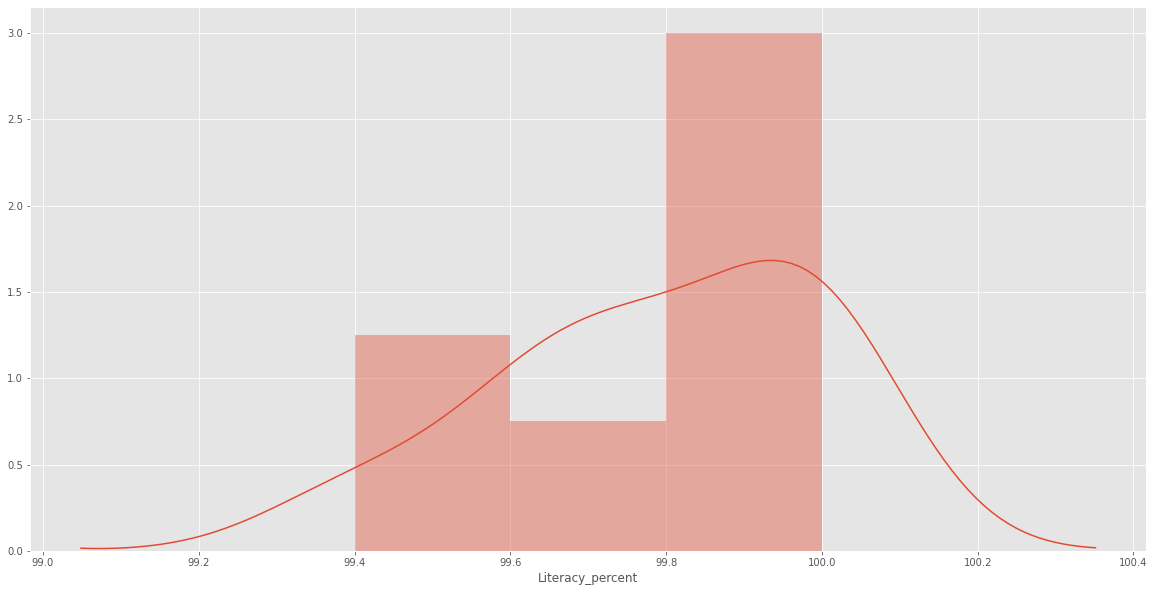

In [44]:
plt.figure(figsize=(20,10))
sns.distplot(cont_lit_sorted['Literacy_percent'])
plt.show()

##### RELATION BETWEEN POPULATION AND LITERACY
##### LITERACY RATES OF THE TOP 20 MOST POPULATED COUNTRIES

In [45]:
fig = go.Figure(data=[go.Bar(x=cont.nlargest(20,'Population')['Country'], y=cont.nlargest(20,'Population')['Literacy_percent'])])
fig.update_layout(title_text='LITERACY RATES OF 20 MOST POPULATED COUNTRIES')
fig.show()

###### Relation between literacy rate and population.

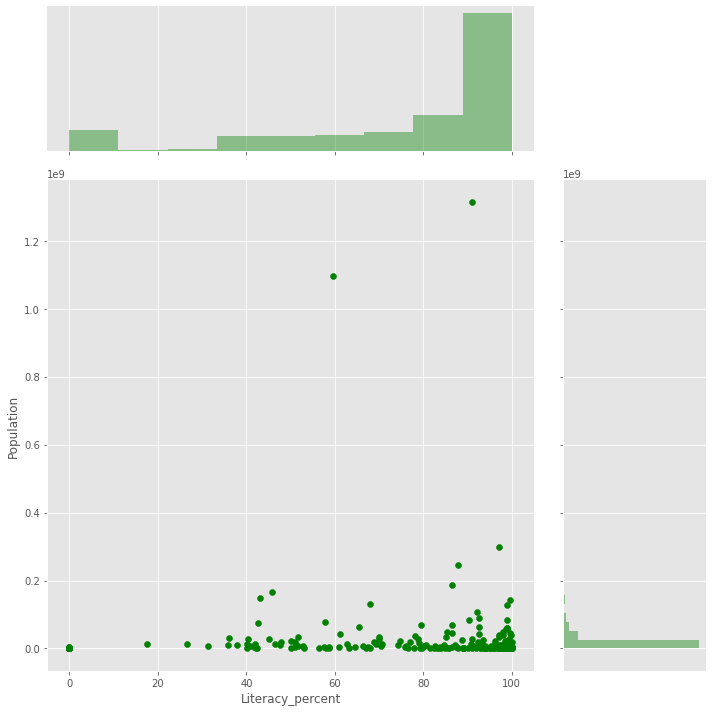

In [46]:
sns.jointplot(x="Literacy_percent", y="Population", data=cont, height=10, ratio=3, color="g")
plt.show()

##### SHOCKINGLY ENOUGH, A HIGHER POPULATION DOESN'T GUARANTEE A HIGH LITERACY RATE

##### RELATION BETWEEN GDP AND LITERACY
##### LITERACY RATES OF THE TOP 20 HIGH GDP COUNTRIES

In [47]:
fig = go.Figure(data=[go.Bar(x=cont.nlargest(20,'GDP_per_capita')['Country'], y=cont.nlargest(20,'GDP_per_capita')['Literacy_percent'])])
fig.update_layout(title_text='LITERACY RATES OF 20 HIGH GDP COUNTIRES')
fig.show()

##### Relation between GDP and literacy

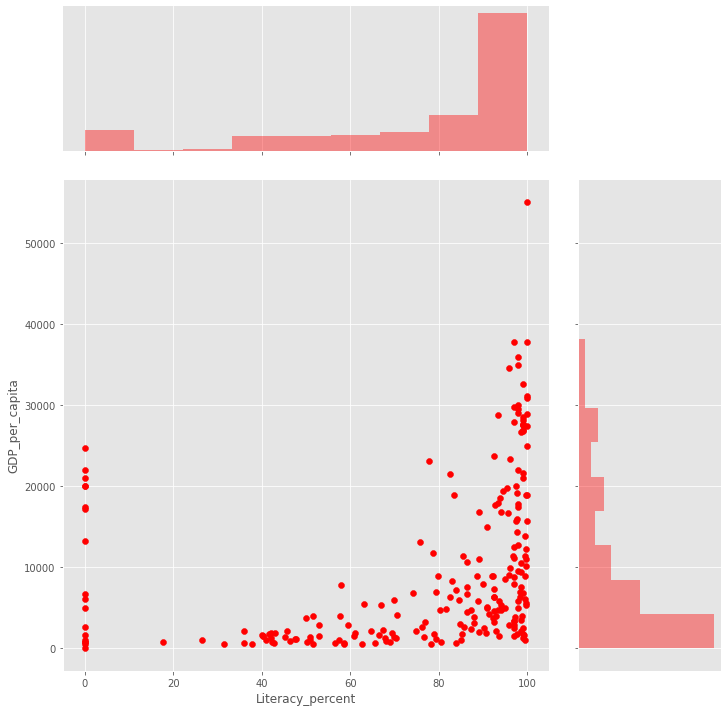

In [48]:
sns.jointplot(x="Literacy_percent", y="GDP_per_capita", data=cont, height=10, ratio=3, color="r")
plt.show()

##### LOW POSITIVE CORRELATION

### FINAL CONCLUSIONS :
The data was analysed to find if the population, GDP etc of a country hold any specific dependence on factors like immortality rate, literacy, sectors of resource and revenue like agriculture, industry and service.

*  China is, as expected, the most populated country in the world, followed closely by India. This supports the next observation that, Asia is the most populated region.
*  However, it shocking to find from analysis that some of the most populated countries(which happen to be developed/developing countries too) have a low Infant Immortality rate.
*  However, analysis shows a positive result that asserts that only 11% of the countries around the world have Death Rates greater than Birth Rates.
*  During analysis of the 3 major sectors of revenue, we saw an anomaly in the data for San Marino. It is impossible for a high GDP country(found from analysis) like San Marino, to have no contribution from the major sectors of revenue. So we concluded that :
    -  The data is missing.
    -  These types of data cannot be estimated as they are precise observations or collections.
    -  We cannot remove the data for San Marino as it provides other vital information on Literacy rate, GDP_per_capita, Mortality rates etc.
    -  The data is kept as it is.
*  WE SEE THAT FOR MOST COUNTRIES, THE MAJOR THRIVING SECTOR IS SERVICE FOLLOWED BY INDUSTRY. 
    -  Except for UAE, which has Industry as its major sector.
*  SAN MARINO AS WE KNOW, HAS NO DATA FOR THESE SECTORS, BUT ITS PRESENCE SHOWS THAT IT IS A HIGH GDP COUNTRY
*  MONACO HAS NO RECORDED DATA FOR ANY SECTOR OTHER THAN AGRICULTURE. THERE CAN BE CONCLUSIONS :
    -  Monaco has only agriculture as its major sector
    -  Data has not been recorded for Monaco
*  The highest literacy rate obtained as per the data is 100%. Countries corresponding to this observation are : 
    -  Australia
    -  Liechtenstein
    -  Andorra
    -  Norway
    -  Luxembourg
    -  Denmark
    -  Finland
*  High GDP and high population doesn't mean a high literacy rate. According to analysis, they are lowly correlated.

THANK YOU :)